In [25]:
# Import libraries and set logger
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.dates import DayLocator

In [26]:
# Parameters
PCD_DIR = "res/point_clouds_meshed"
PCD_PATTERN = "sampled*.ply"  
OUT_DIR = "res/volumes_variations"
DOD_DIR = "x"
TSTEP = 3
GRID_STEP = 0.2

Read dataframe and manipulate data

In [27]:
# Get the path of the output file with respect to belpy root folder
out_dir = Path().parent.absolute().parents[1] / OUT_DIR
fout_name = f"{PCD_PATTERN.split('*')[0]}_dir{DOD_DIR.upper()}_tstep{TSTEP}_grid{GRID_STEP}"
fout = out_dir / f"{fout_name}.csv"

# Read volume results from file and make plot
column_names = [
    "pcd0",
    "pcd1",
    "volume",
    "addedVolume",
    "removedVolume",
    "surface",
    "matchingPercent",
    "averageNeighborsPerCell",
]
df = pd.read_csv(fout, sep=",", names=column_names)

# Build date index, sort dataframe and compute dt
max_surface_match = df["matchingPercent"].to_numpy().max()
df["date_in"] = pd.to_datetime(
    df["pcd0"].str.replace(f"{PCD_PATTERN.split('*')[0]}_", ""), format="%Y_%m_%d"
)
df.sort_values(by="date_in", inplace=True)

df["date_fin"] = pd.to_datetime(
    df["pcd1"].str.replace(f"{PCD_PATTERN.split('*')[0]}_", ""), format="%Y_%m_%d"
)
df["dt"] = (df.date_fin - df.date_in) / np.timedelta64(1, "D")

# Compute daily volume variation and normalize by area
df["volume_daily"] = df["volume"] / df["dt"]
df["volume_daily_normalized"] = (
    df["volume_daily"] / df["matchingPercent"] * max_surface_match
)

# Compute cumulated volumes
df["volume_daily_cumul"] = df["volume_daily"].cumsum()
df["volume_daily_norm_cumul"] = df["volume_daily_normalized"].cumsum()

# Export results to excel file
df.to_excel(out_dir / f"{fout_name}.xlsx", index=False)

Plots

In [28]:
# Old plots

# fig, ax = plt.subplots(1, 1)
# ax.grid(visible=True, which="both")
# ax.plot(df["date_in"], df["volume_daily"])
# ax.set_xlabel("day")
# ax.set_ylabel("m^3")
# ax.set_title("Daily volume difference")
# fig.set_size_inches(18.5, 10.5)
# fig.savefig(out_dir / f"{fout_name}_daily_diff.png", dpi=300)

# fig, ax = plt.subplots(1, 1)
# ax.grid(visible=True, which="both")
# ax.plot(df["date_in"], df["volume_daily_normalized"])
# ax.set_xlabel("day")
# ax.set_ylabel("m^3")
# ax.set_title("Daily volume difference")
# fig.set_size_inches(18.5, 10.5)
# fig.savefig(out_dir / f"{fout_name}_daily_diff_norm.png", dpi=300)


# fig, ax = plt.subplots(1, 1)
# ax.grid(visible=True, which="both")
# ax.plot(df["date_in"], df["volume_daily_norm_cumul"])
# ax.set_xlabel("day")
# ax.set_ylabel("m^3")
# ax.set_title("Daily volume difference cumulated")
# fig.set_size_inches(18.5, 10.5)
# fig.savefig(out_dir / f"{fout_name}_daily_diff_norm_cumulated.png", dpi=300)

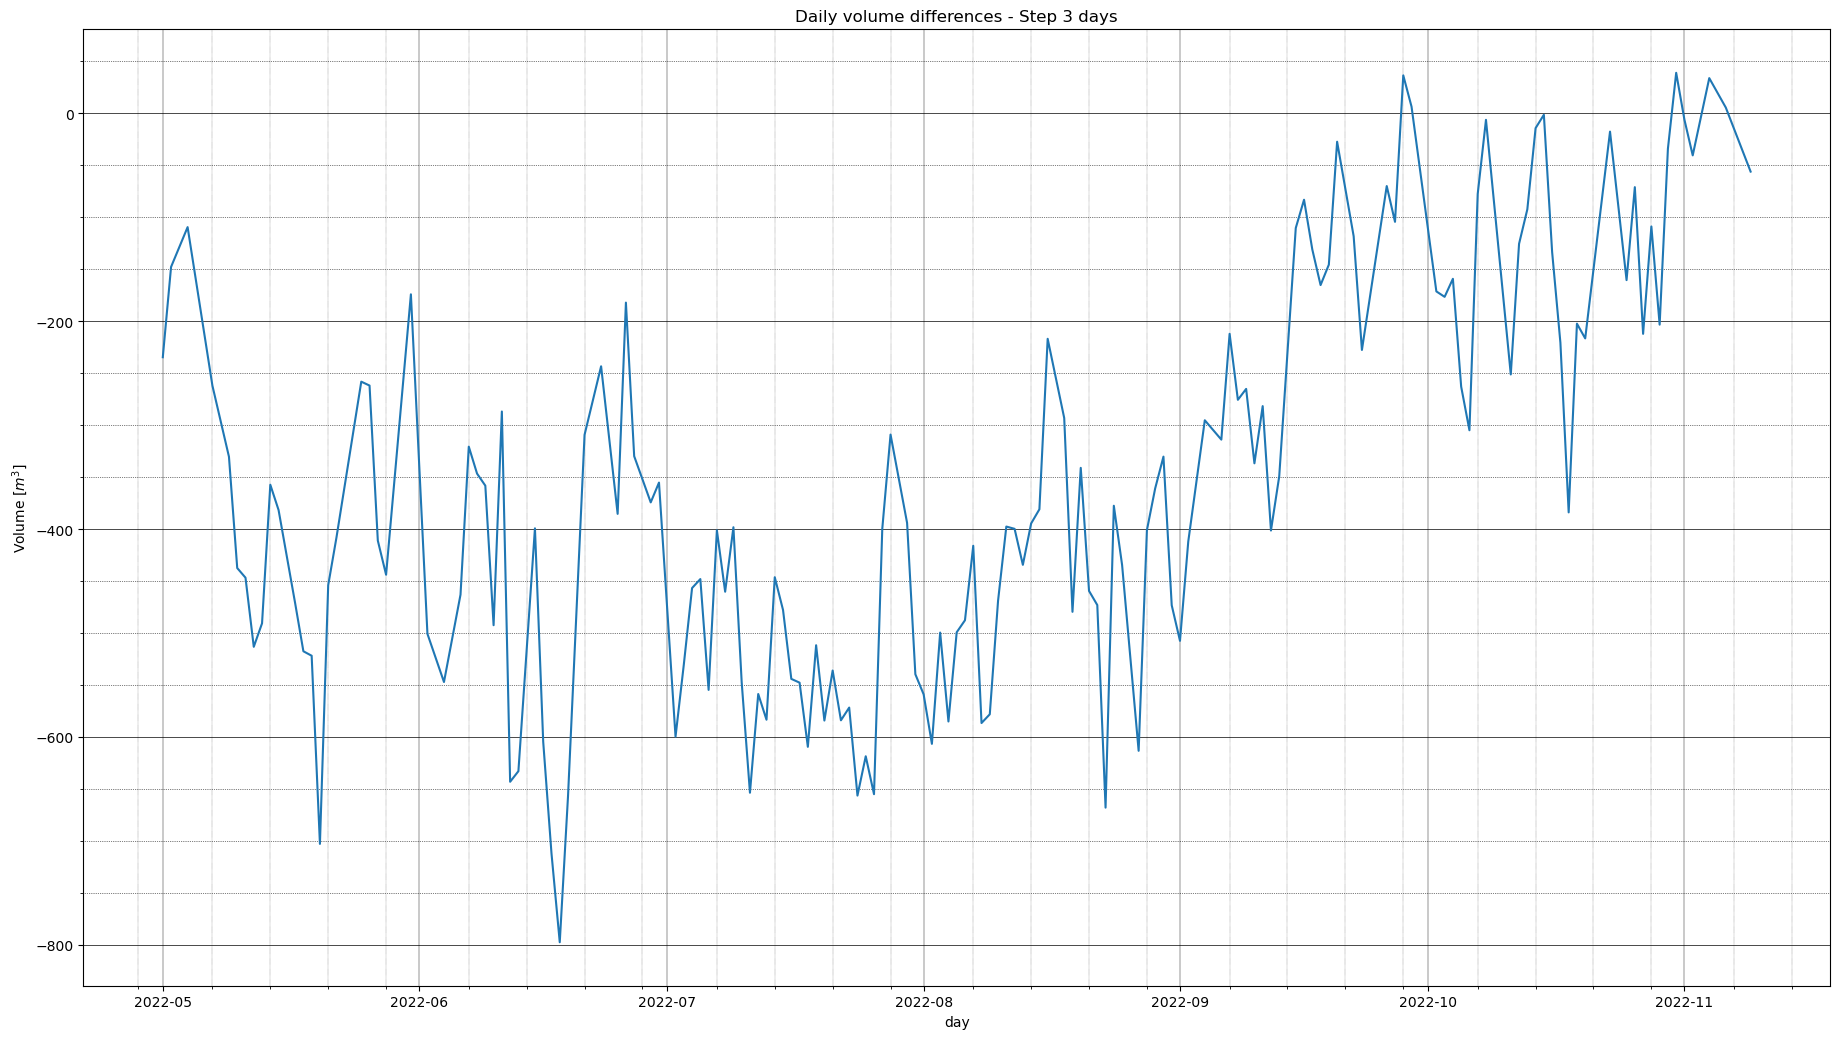

In [29]:
# Daily volumes 
fig, ax = plt.subplots()
fig.set_tight_layout(True)

ax.grid(visible=True, which="both")
ax.plot(df["date_in"], df["volume_daily_normalized"])
ax.set_xlabel("day")
ax.set_ylabel("Volume [$m^3$]")
ax.set_title(f"Daily volume differences - Step {TSTEP} days")
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', axis ='y', linewidth='0.5', color='black')
ax.grid(which='major', axis ='x', linewidth='0.3', color='black')
ax.grid(which='minor', axis ='y', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', axis ='x', linestyle=':', linewidth='0.3', color='black')
ax.xaxis.set_minor_locator(DayLocator(bymonthday=[1,7,14,21,28], interval=1, tz=None))
fig.set_size_inches(18.5, 10.5)
fig.savefig(out_dir / f"{fout_name}_daily_diff_norm.png", dpi=300)

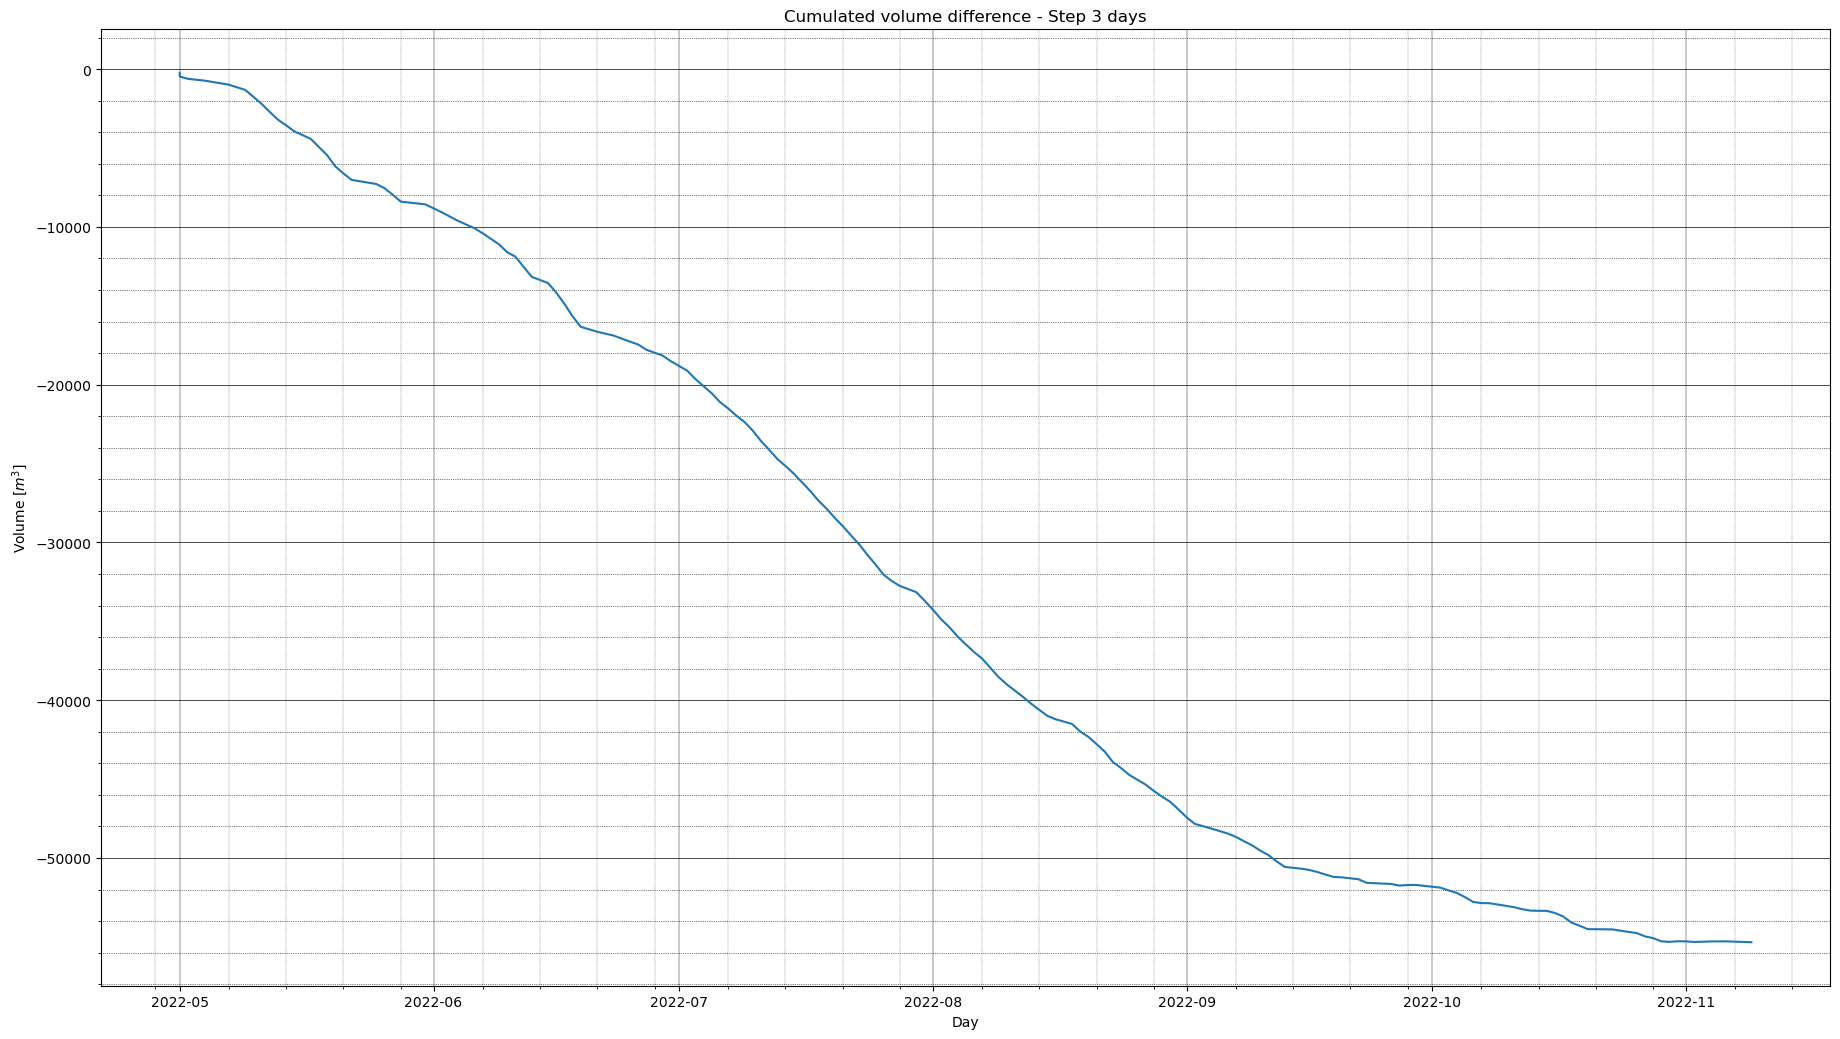

In [30]:
# Cumulated volumes
fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.plot(df["date_in"], df["volume_daily_norm_cumul"])
ax.set_xlabel("Day")
ax.set_ylabel("Volume [$m^3$]")
ax.set_title(f"Cumulated volume difference - Step {TSTEP} days")
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', axis ='y', linewidth='0.5', color='black')
ax.grid(which='major', axis ='x', linewidth='0.3', color='black')
ax.grid(which='minor', axis ='y', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', axis ='x', linestyle=':', linewidth='0.3', color='black')
ax.xaxis.set_minor_locator(DayLocator(bymonthday=[1,7,14,21,28], interval=1, tz=None))
fig.set_size_inches(18.5, 10.5)
fig.savefig(out_dir / f"{fout_name}_daily_diff_norm_cumulated.png", dpi=300)
